In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
'''
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
'''

'\ndef plot_confusion_matrix(cm,\n                          target_names,\n                          title=\'Confusion matrix\',\n                          cmap=None,\n                          normalize=True):\n    """\n    given a sklearn confusion matrix (cm), make a nice plot\n\n    Arguments\n    ---------\n    cm:           confusion matrix from sklearn.metrics.confusion_matrix\n\n    target_names: given classification classes such as [0, 1, 2]\n                  the class names, for example: [\'high\', \'medium\', \'low\']\n\n    title:        the text to display at the top of the matrix\n\n    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm\n                  see http://matplotlib.org/examples/color/colormaps_reference.html\n                  plt.get_cmap(\'jet\') or plt.cm.Blues\n\n    normalize:    If False, plot the raw numbers\n                  If True, plot the proportions\n\n    Usage\n    -----\n    plot_confusion_matrix(cm           = cm,  

In [3]:
activities = {"A": "Workout Session", 
 "B": "Grabbing Food Or Drinks Together", 
 "C":"Karaoke", 
 "D":"Picnic", 
 "E": "Cooking/Baking Class", 
 "F": "Video Games", 
 "G": "Online Shopping Session", 
 "H": "Painting Social", 
 "I": "Book Club", 
 "J": "Self-Care Sheet Mask + Tea Session", 
 "K": "Study Together", 
 "L": "Group Games"}

In [4]:
data = [{"user1": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"], 
 "user2": ["B", "D", "E", "J", "L", "A", "F", "K", "C", "H", "G", "I"], 
  "model": ["D", "A", "B", "E", "H", "J", "L", "F", "C", "K", "I", "G"]}, 
{"user1": ["B", "D", "A", "F", "L", "K", "E", "C", "H", "I", "J", "G"],
 "user2": ["B", "F", "E", "D", "J", "K", "H", "A", "L", "I", "G", "C"],
 "model": ["D", "A", "B", "E", "H", "J", "L", "F", "C", "K", "I", "G"]},
{"user1": ["B", "J", "H", "D", "K", "I", "E", "G", "A", "C", "L", "F"],
 "user2": [np.nan]*12,
 "model": ["D", "A", "B", "E", "H", "J", "L", "F", "C", "K", "I", "G"]}, 
{"user1": ["B", "D", "E", "J", "A", "H", "C", "I", "K", "L", "F", "G"],
 "user2": ["B", "J", "H", "K", "D", "I", "E", "G", "A", "C", "L", "F"], 
 "model": ["J", "G", "L", "F", "E", "C", "D", "K", "H", "I", "A", "B"]}, 
{"user1": ["B", "H", "D", "E", "A", "K", "F", "C", "I", "J", "L", "G"],
 "user2": [np.nan]*12, 
 "model": ["D", "A", "B", "E", "H", "J", "L", "F", "C", "K", "I", "G"]}, 
{"user1": ["B", "L", "D", "J", "E", "H", "I", "A", "C", "G", "F", "K"], 
 "user2": ["B", "J", "D", "C", "H", "E", "A", "F", "L", "G", "K", "I"], 
 "model": ["D", "A", "B", "E", "H", "J", "L", "F", "C", "K", "I", "G"]}, 
{"user1": ["D", "B", "C", "J", "A", "E", "H", "I", "K", "G", "L", "F"], 
 "user2": [np.nan]*12, 
 "model": ["L", "F", "C", "H", "I", "G", "E", "D", "K", "J", "B", "A"]}, 
{"user1": ["C", "F", "L", "B", "E", "D", "H", "J", "G", "K", "I", "A"],
 "user2": ["C", "L", "B", "E", "D", "F", "A", "H", "J", "K", "I", "G"], 
 "model": ["D", "A", "B", "E", "H", "J", "L", "F", "C", "K", "I", "G"]}, 
{"user1": ["E", "H", "L", "B", "I", "J", "C", "K", "A", "D", "F", "G"], 
 "user2": ["B", "D", "E", "H", "J", "K", "L", "A", "C", "F", "G", "I"], 
 "model": ["D", "A", "B", "E", "H", "J", "L", "F", "C", "K", "I", "G"]}, 
{"user1": [np.nan]*12, 
 "user2": ["D", "B", "H", "C", "F", "J", "L", "E", "A", "I", "K", "G"], 
 "model": ["E", "D", "J", "L", "F", "C", "B", "K", "A", "H", "I", "G"]}]

In [5]:
def calculate_metric(user1, user2, model, top):
  positive1 = user1[:top]
  GT1 = user1.isin(positive1)
  pred1 = model.isin(positive1)

  positive2 = user2[:top]
  GT2 = user2.isin(positive2)
  pred2 = model.isin(positive2)

  return (f1_score(GT1, pred1), f1_score(GT2, pred2))

,user1,user2,model,i,F1_user1@i,F1_user2@i
0,A,B,D,1,0.000000,0.000000
1,B,D,A,2,0.500000,0.500000
2,C,E,B,3,0.666667,0.666667
3,D,J,E,4,0.750000,0.750000
4,E,L,H,5,0.800000,0.600000
5,F,A,J,6,0.666667,0.833333
6,G,F,L,7,0.571429,0.857143
7,H,K,F,8,0.750000,0.875000
8,I,C,C,9,0.777778,0.888889
9,J,H,K,10,0.800000,1.000000


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,B,B,D,1,0.000000,0.000000
1,D,F,A,2,0.500000,0.000000
2,A,E,B,3,1.000000,0.333333
3,F,D,E,4,0.750000,0.750000
4,L,J,H,5,0.600000,0.600000
5,K,K,J,6,0.500000,0.666667
6,E,H,L,7,0.714286,0.714286
7,C,A,F,8,0.750000,0.875000
8,H,L,C,9,0.888889,0.888889
9,I,I,K,10,0.900000,0.900000


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,B,NaN,D,1,0.000000,0.0
1,J,NaN,A,2,0.000000,0.0
2,H,NaN,B,3,0.333333,0.0
3,D,NaN,E,4,0.500000,0.0
4,K,NaN,H,5,0.600000,0.0
5,I,NaN,J,6,0.666667,0.0
6,E,NaN,L,7,0.714286,0.0
7,G,NaN,F,8,0.625000,0.0
8,A,NaN,C,9,0.666667,0.0
9,C,NaN,K,10,0.800000,0.0


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,B,B,J,1,0.000000,0.000000
1,D,J,G,2,0.000000,0.500000
2,E,H,L,3,0.000000,0.333333
3,J,K,F,4,0.250000,0.250000
4,A,D,E,5,0.400000,0.200000
5,H,I,C,6,0.333333,0.166667
6,C,E,D,7,0.571429,0.428571
7,I,G,K,8,0.500000,0.625000
8,K,A,H,9,0.666667,0.666667
9,L,C,I,10,0.800000,0.800000


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,B,NaN,D,1,0.000000,0.0
1,H,NaN,A,2,0.000000,0.0
2,D,NaN,B,3,0.666667,0.0
3,E,NaN,E,4,0.750000,0.0
4,A,NaN,H,5,1.000000,0.0
5,K,NaN,J,6,0.833333,0.0
6,F,NaN,L,7,0.714286,0.0
7,C,NaN,F,8,0.750000,0.0
8,I,NaN,C,9,0.777778,0.0
9,J,NaN,K,10,0.900000,0.0


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,B,B,D,1,0.000000,0.000000
1,L,J,A,2,0.000000,0.000000
2,D,D,B,3,0.666667,0.666667
3,J,C,E,4,0.500000,0.500000
4,E,H,H,5,0.600000,0.600000
5,H,E,J,6,0.833333,0.833333
6,I,A,L,7,0.857143,0.857143
7,A,F,F,8,0.875000,0.875000
8,C,L,C,9,0.888889,1.000000
9,G,G,K,10,0.800000,0.900000


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,D,NaN,L,1,0.000000,0.0
1,B,NaN,F,2,0.000000,0.0
2,C,NaN,C,3,0.333333,0.0
3,J,NaN,H,4,0.250000,0.0
4,A,NaN,I,5,0.200000,0.0
5,E,NaN,G,6,0.166667,0.0
6,H,NaN,E,7,0.428571,0.0
7,I,NaN,D,8,0.625000,0.0
8,K,NaN,K,9,0.666667,0.0
9,G,NaN,J,10,0.800000,0.0


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,C,C,D,1,0.000000,0.000000
1,F,L,A,2,0.000000,0.000000
2,L,B,B,3,0.000000,0.333333
3,B,E,E,4,0.250000,0.500000
4,E,D,H,5,0.400000,0.600000
5,D,F,J,6,0.500000,0.500000
6,H,A,L,7,0.714286,0.714286
7,J,H,F,8,0.875000,0.875000
8,G,J,C,9,0.888889,1.000000
9,K,K,K,10,0.900000,1.000000


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,E,B,D,1,0.000000,0.000000
1,H,D,A,2,0.000000,0.500000
2,L,E,B,3,0.000000,0.666667
3,B,H,E,4,0.500000,0.750000
4,I,J,H,5,0.600000,0.800000
5,J,K,J,6,0.666667,0.833333
6,C,L,L,7,0.714286,0.857143
7,K,A,F,8,0.625000,0.875000
8,A,C,C,9,0.777778,0.888889
9,D,F,K,10,0.900000,1.000000


,user1,user2,model,i,F1_user1@i,F1_user2@i
0,NaN,D,E,1,0.0,0.000000
1,NaN,B,D,2,0.0,0.500000
2,NaN,H,J,3,0.0,0.333333
3,NaN,C,L,4,0.0,0.250000
4,NaN,F,F,5,0.0,0.400000
5,NaN,J,C,6,0.0,0.666667
6,NaN,L,B,7,0.0,0.857143
7,NaN,E,K,8,0.0,0.875000
8,NaN,A,A,9,0.0,0.888889
9,NaN,I,H,10,0.0,0.900000


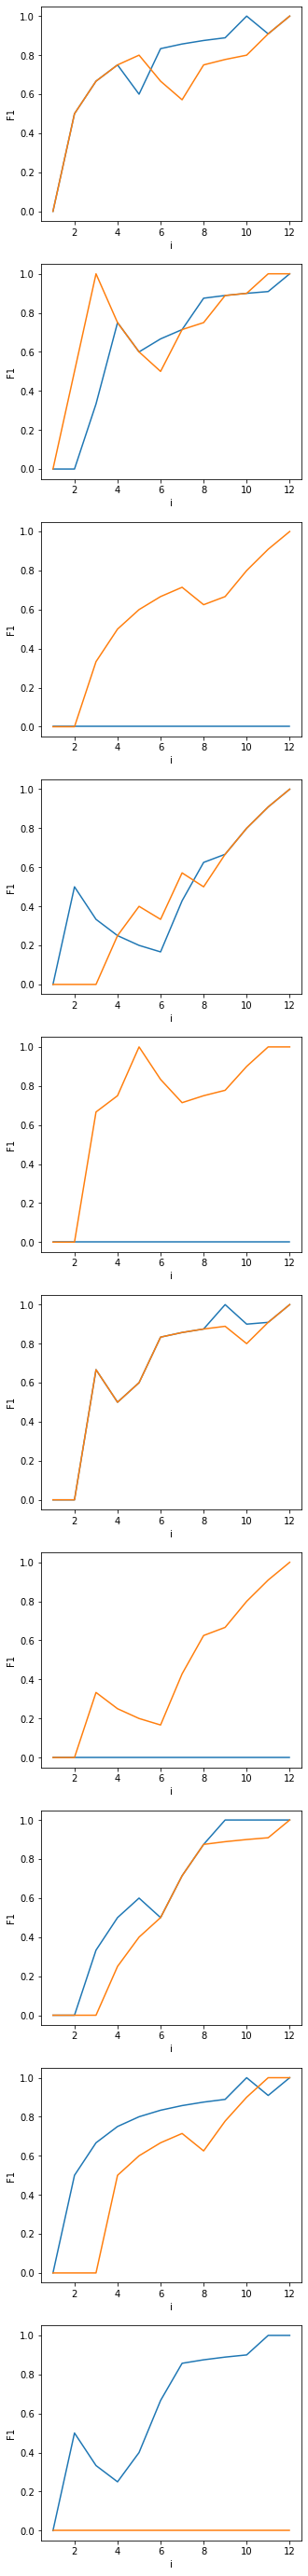

In [6]:
fig, axes = plt.subplots(10, 1, figsize = (5, 50))

F1_total = []
for i in range(0, 10): 
  record = data[i]
  df = pd.DataFrame(record)
  user1 = df["user1"]
  user2 = df["user2"]
  model = df["model"]
  F1_scores = [calculate_metric(user1, user2, model, i) for i in range(1, 13)]

  F1_user1 = [scores[0] for scores in F1_scores]
  F1_user2 = [scores[1] for scores in F1_scores]


  if np.any(F1_user1):
    F1_total.append(np.array(F1_user1))
  if np.any(F1_user2):
    F1_total.append(np.array(F1_user2))

  df["i"] = np.arange(1, 13)
  df["F1_user1@i"] = F1_user1
  df["F1_user2@i"] = F1_user2


  sns.lineplot(ax = axes[i], data = df, x = "i", y = "F1_user2@i")
  sns.lineplot(ax = axes[i], data = df, x = "i", y = "F1_user1@i")
  axes[i].set_ylabel("F1")
  display(df)

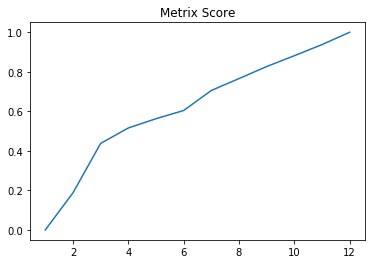

In [22]:
avg_F1_total = sum(F1_total)/len(F1_total)
sns.lineplot(x = np.arange(1, 13), y = avg_F1_total).set_title('Metrix Score')
plt.show()